# Final Project Submission

Please fill out:
* Student name: <strong>Michael Mahoney</strong>
* Student pace: self paced / <strong>part time</strong> / full time
* Scheduled project review date/time: 
* Instructor name: <strong>James Irving</strong>
* Blog post URL:


# Project Overview
## Abstract
## Scpoe
The purpose of this project is to explore the King County Housing data to discover what variables are the best predictors of sale price. The following elements will be considered to be the primary scope of the project.

* Question 1: 
* Question 2: 
* Question 3: 

## Methodology: CRISP-DM
* Investigating the existing data
* Cleaning data by discarding or replacing null and/or filler data
* Analysis of the independant variables
* Preforming a linear regression analysis of the data and revising as needed

# Package Dependancies
* Numpy
* Pandas
* Matplotlib.pyplot
* scipy.stats
* Seaborn
* statsmodels
* scikit-learn

# Baseline Data-Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
import datetime

In [2]:
# Toggle the following line to show all columns
pd.set_option('display.max_columns', None)

## First Look

In [3]:
# Import the data set for pre-processing and save it to a variable
dfInitial = pd.DataFrame(pd.read_csv('kc_house_data.csv'))
print(f'The DataFrame is of dimensions {dfInitial.shape} \n')
display(dfInitial.head())
display(dfInitial.info())

The DataFrame is of dimensions (21597, 21) 



id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

From our info list we see that many of the data types have been imput incorrectly. We will now go through reassign the correct data types for use in the regression model.

## Changing Column Data Types

### Date-times

The date column appears to be the only datetime column. It is currectly assigned to dtype 'object' which is the string type in pandas. We use the following code to change this column to the correct type.

In [4]:
dfInitial['date'] = pd.to_datetime(dfInitial['date'])

We check to make sure the conversion was successful

In [5]:
dfInitial.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Numerical

There also only appear to be one mis-typed numerical column, being 'sqft_basement'. Because the column has null values encoded as the question mark symbol '?', we will replace this with the none type and address this later.

In [6]:
dfInitial['sqft_basement'].loc[dfInitial['sqft_basement'] == '?'] = None
dfInitial['sqft_basement'].isna().sum()
dfInitial['sqft_basement'] = pd.to_numeric(dfInitial['sqft_basement'])
dfInitial.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Categorical

We now look to re-assign to categories. When looking at our columns, there are several instances of categories being coded as numerical columns. From the descrtiption of our columns as provided in the repository the following columns are better encoded as categories: 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms' and 'floors'. Pandas has a specific dtype called 'category' for this type of encoding.

In [7]:
# We are going to do something special to the 'yr_renovated' column to change its type to  first
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].apply(lambda x: int(x) if x == None else x)
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].astype('object')
dfInitial['view'] = dfInitial['view'].apply(lambda x: int(x) if x == None else x)
dfInitial['view'] = dfInitial['view'].astype('object')
catCols = ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
dfInitial[catCols] = dfInitial[catCols].astype('category')
dfInitial.info()
dfInitial['yr_renovated']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  category      
 9   view           21534 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  category      
 15  yr_renovated   1775

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: category
Categories (70, float64): [0.0, 1934.0, 1940.0, 1944.0, ..., 2012.0, 2013.0, 2014.0, 2015.0]

With everything typed correctly we now move on to cleaning the data

## Detecting and Managing Null Values

### Finding placeholder values

Place holder values are entries of non-null data that are meant to serve as null data. As we've seen, there has already been one instance of place holder values in the sqft_basement column that we changed to null in order to cast the column as a new data type. We now formally go through all columns and determine the method for dealing with these values (which cannot be present for regression techniques). A common way to find these values is to map the usage of values in each column. 

In [8]:
for x in dfInitial.columns:
    display(dfInitial[x].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1954.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 70, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

Somewhat remarkably, it looks like the 'sqft_basement' column was the only one to contain placeholder values. 

### Null Values

The first question to answer is whether we should drop any columns outright based on missing data. We do a quick proportionality test for the null values as follows.

In [9]:
dfInitial.isna().sum()/len(dfInitial['id'])

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

Normally, for a column to be missing more than 10% of the data is worth considering throwing out. However, for our baseline model we will keep all columns in and decide if they warrant removal after the initial round of regression. As a further baseline measure we will fill these null values with the average for numerical data and the median for categorical data.

#### Numerical Null Values

The numerical columns with null values are 'sqft_basement'. We proceed by finding the mean of the non-null data and using this value as a fill in. 

In [10]:
def fillNull(df, columns, numericalData = True, naive = True, showInfo = False):
    '''
        This function takes in a DataFrame and column names of the DataFrame which 
        have null values. It also has an option 'naive' which takes a bool. If set 
        to true, fillNull will fill in all null numerical data with the average of 
        the column the data was pulled from.
        
        Parameters:
        
            df - A pandas DataFrame object (pd.DataFrame())

            columns - A list of column names from the columns of a pandas DataFrame 
                      object (pd.DataFrame()[column])
                      
            numericalData - A bool value that types the list of columns being fed.
                            If true, the mean value of the column will be used to fill
                            in missing values. If false, the null values will be made
                            into their own column.

            naive - A bool value that determines the method for filling in the null 
                    values. Default is True.

            showInfo - A bool value that determines if the df[x].value_counts() command
                       will be displayed upon executing the function.
                   
        Returns:
        
            None
            
    '''
    if numericalData == True:
        for x in columns:
            fillIn = df[x].mean()
            df[x] = df[x].fillna(fillIn)
            if showInfo == True:
                display(f'Column {x} now has {df[x].isna().sum()} null values')
                display(f'The mean of column {x} = {fillIn}')
                display(df[x].value_counts())
    else:
        for x in columns:
            df[x] = df[x].astype('object')
            fillIn = 'Null'
            df[x] = df[x].fillna(fillIn)
            df[x] = df[x].astype('category')
            if showInfo == True:
                display(f'Column {x} now has {df[x].isna().sum()} null values')
                display(f'The mean of column {x} = {fillIn}')
                display(df[x].value_counts())
fillNull(dfInitial, ['sqft_basement'], showInfo = True)        


'Column sqft_basement now has 0 null values'

'The mean of column sqft_basement = 291.851723974838'

0.000000       12826
291.851724       454
600.000000       217
500.000000       209
700.000000       208
               ...  
588.000000         1
1920.000000        1
2390.000000        1
1245.000000        1
1135.000000        1
Name: sqft_basement, Length: 304, dtype: int64

#### Null categorical data

The catagorical columns with nulls are: 'waterfront', 'view' and 'yr_renovated'. For the baseline model we will make the null values into their own column.

In [11]:
fillNull(dfInitial, ['waterfront', 'view','yr_renovated'],numericalData = False, showInfo = True)

'Column waterfront now has 0 null values'

'The mean of column waterfront = Null'

0.0     19075
Null     2376
1.0       146
Name: waterfront, dtype: int64

'Column view now has 0 null values'

'The mean of column view = Null'

0.0     19422
2.0       957
3.0       508
1.0       330
4.0       317
Null       63
Name: view, dtype: int64

'Column yr_renovated now has 0 null values'

'The mean of column yr_renovated = Null'

0.0       17011
Null       3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1948.0        1
1946.0        1
1944.0        1
1934.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

## Removing Duplicated

Now that all null values have been dealt with we will do one final processing step to make sure there aren't any duplicates that will skew our regression analysis. 

In [12]:
dfInitial.duplicated().sum()

0

With no duplicated entries we create a copy of the processed data for the regression steps.

In [13]:
dfPreprocessed = dfInitial.copy()
dfPreprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  category      
 9   view           21597 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  category      
 15  yr_renovated   2159

# Building The Baseline Model

## Numerical Data

### Validating Assumptions of Linear Regression

We begin the modeling process with our numerical data. As this project is concerned with linear regression, our first question to answer is whether the data meets the assumptions of a linear model.

#### Linearity

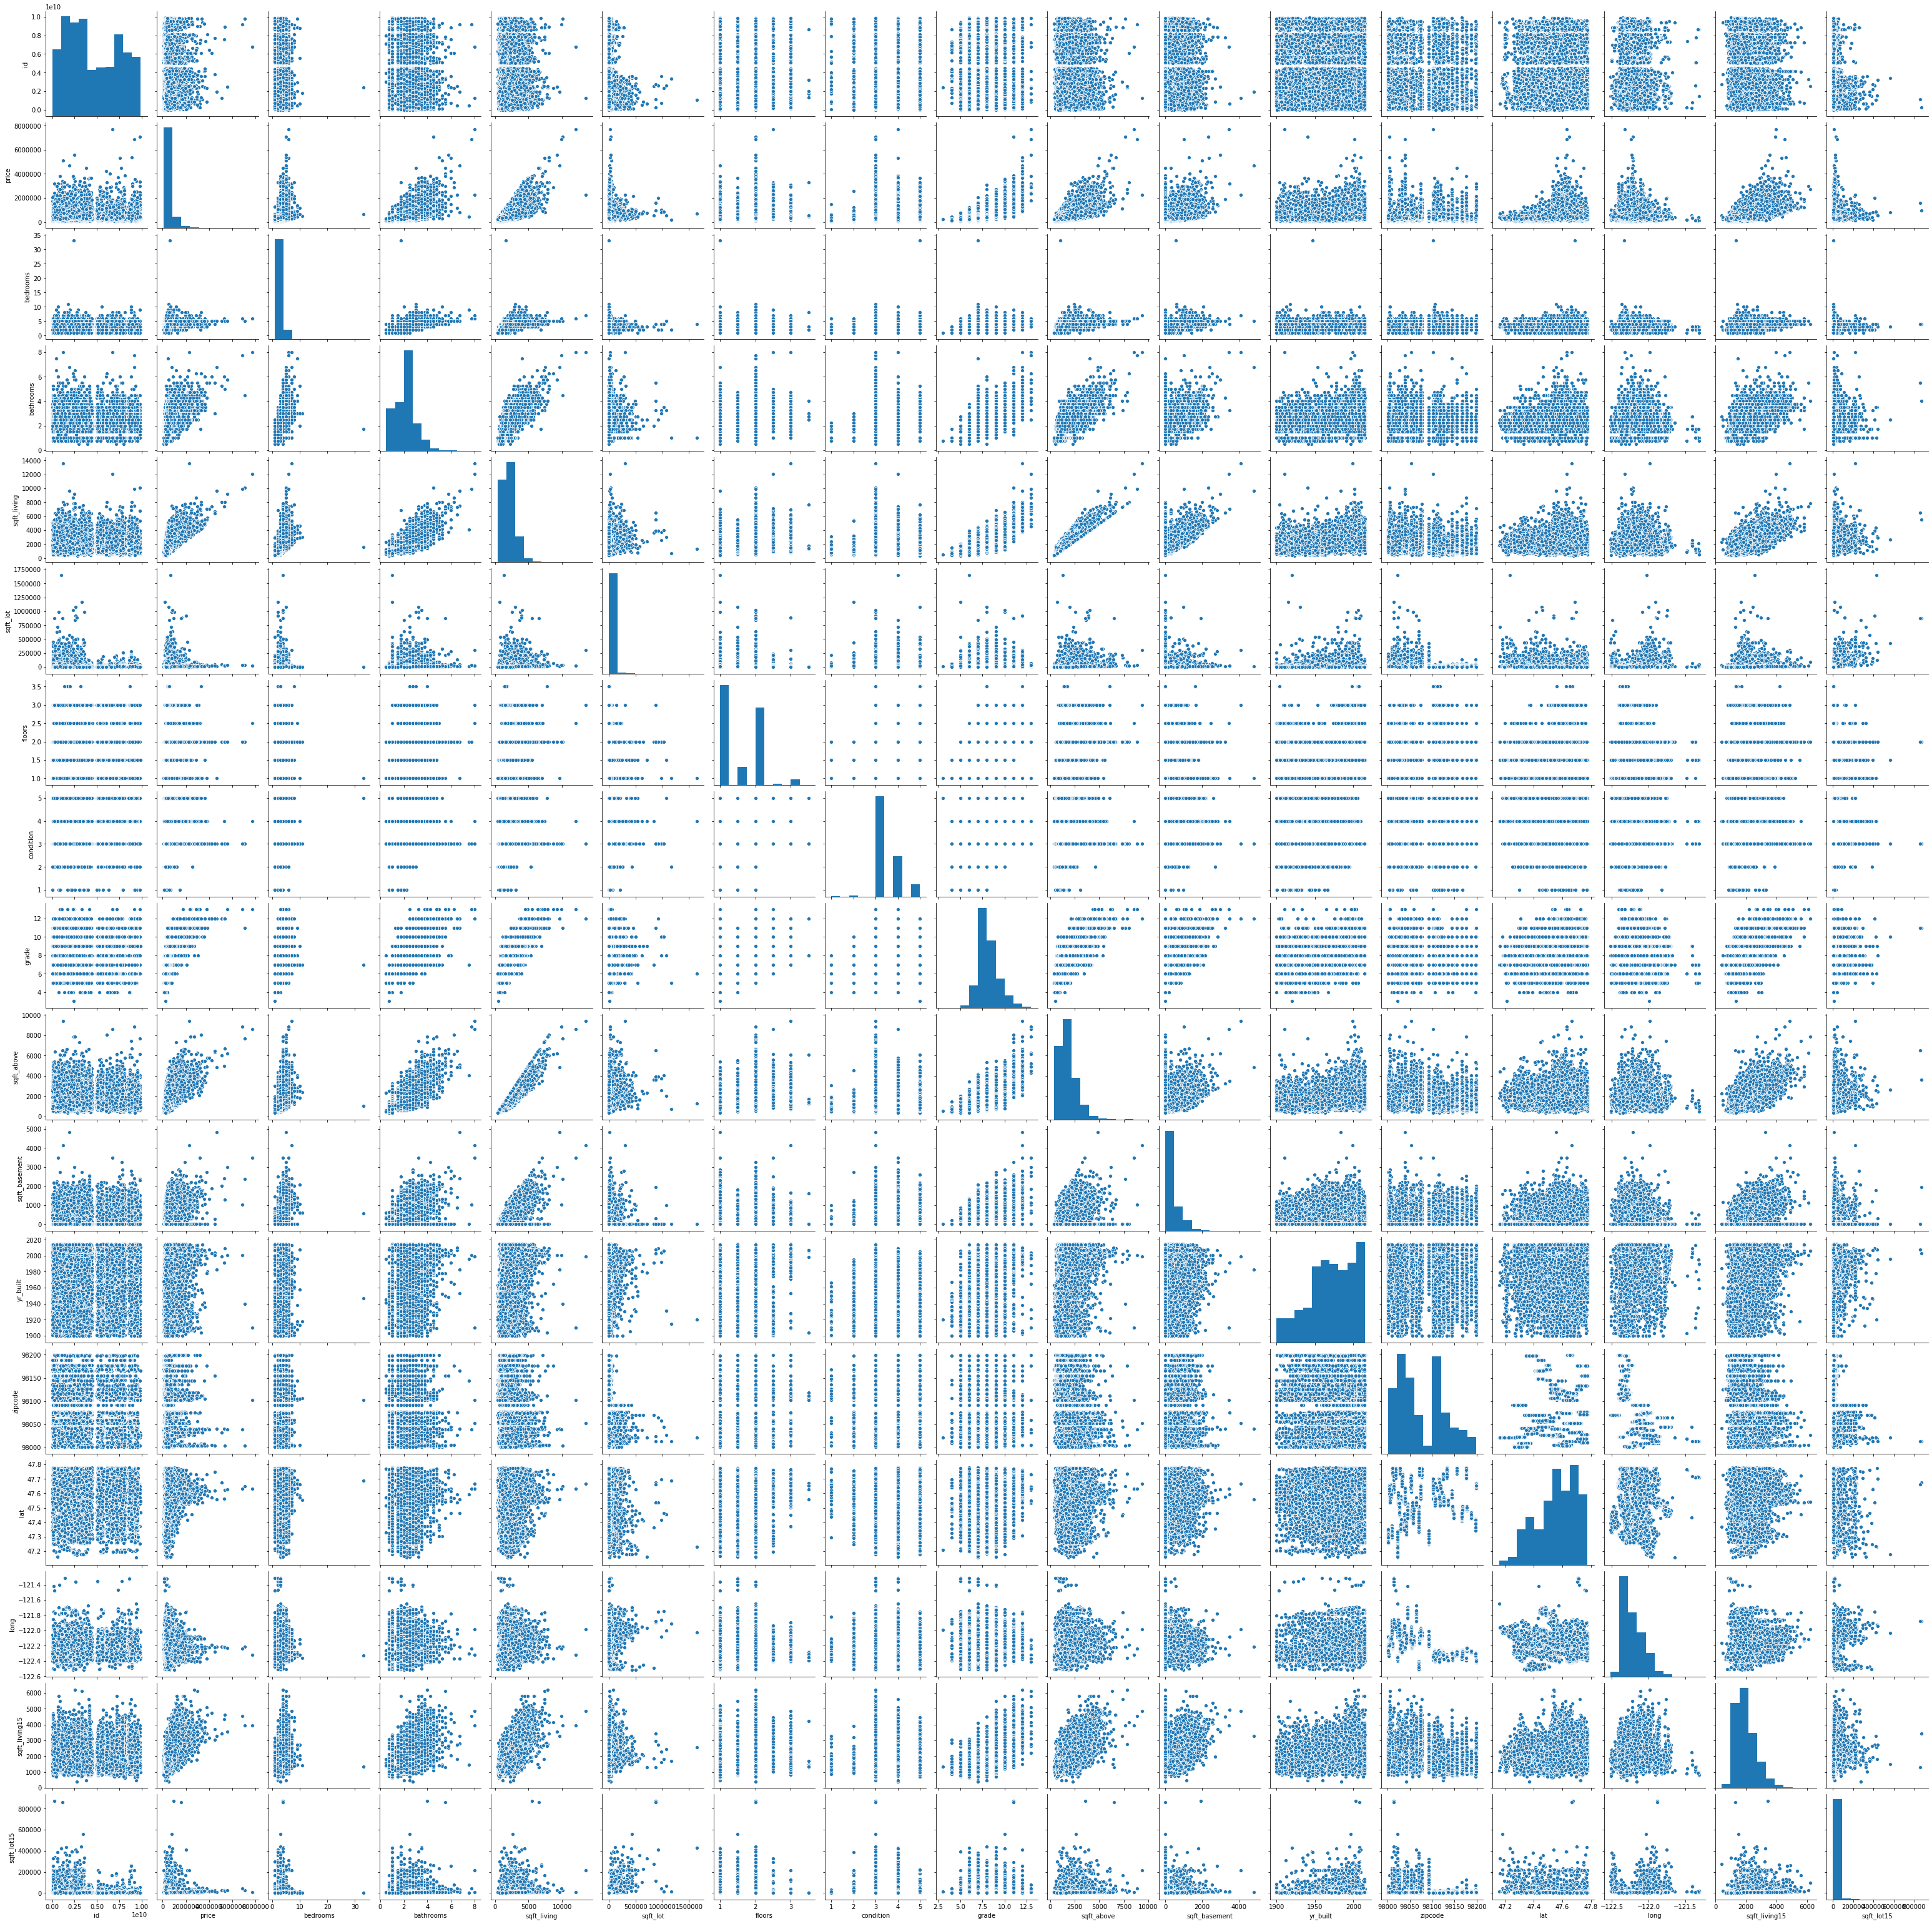

In [14]:
sns.pairplot(dfPreprocessed)

This are looking linear in general with the exception of lat/long, zip, id, and neighboring lot data. We will proceed with the baseline model as though the linear assumption is satisfied. Subsequent models will take a more serious approach. 

#### Normality Of Numerical Data

In [16]:
# stats.normaltest()

'NormaltestResult(statistic=19103.12922431625, pvalue=0.0)'

'NormaltestResult(statistic=13605.48590817043, pvalue=0.0)'

'NormaltestResult(statistic=1446.944391092601, pvalue=0.0)'

'NormaltestResult(statistic=6855.449019773223, pvalue=0.0)'

'NormaltestResult(statistic=38919.8713482212, pvalue=0.0)'

'NormaltestResult(statistic=1554.261697908209, pvalue=0.0)'

'NormaltestResult(statistic=6010.928373136612, pvalue=0.0)'

'NormaltestResult(statistic=6285.543043405674, pvalue=0.0)'

'NormaltestResult(statistic=1779.5572414724743, pvalue=0.0)'

'NormaltestResult(statistic=2568.0999446637043, pvalue=0.0)'

'NormaltestResult(statistic=3736.2275785753695, pvalue=0.0)'

'NormaltestResult(statistic=32978.41925603968, pvalue=0.0)'

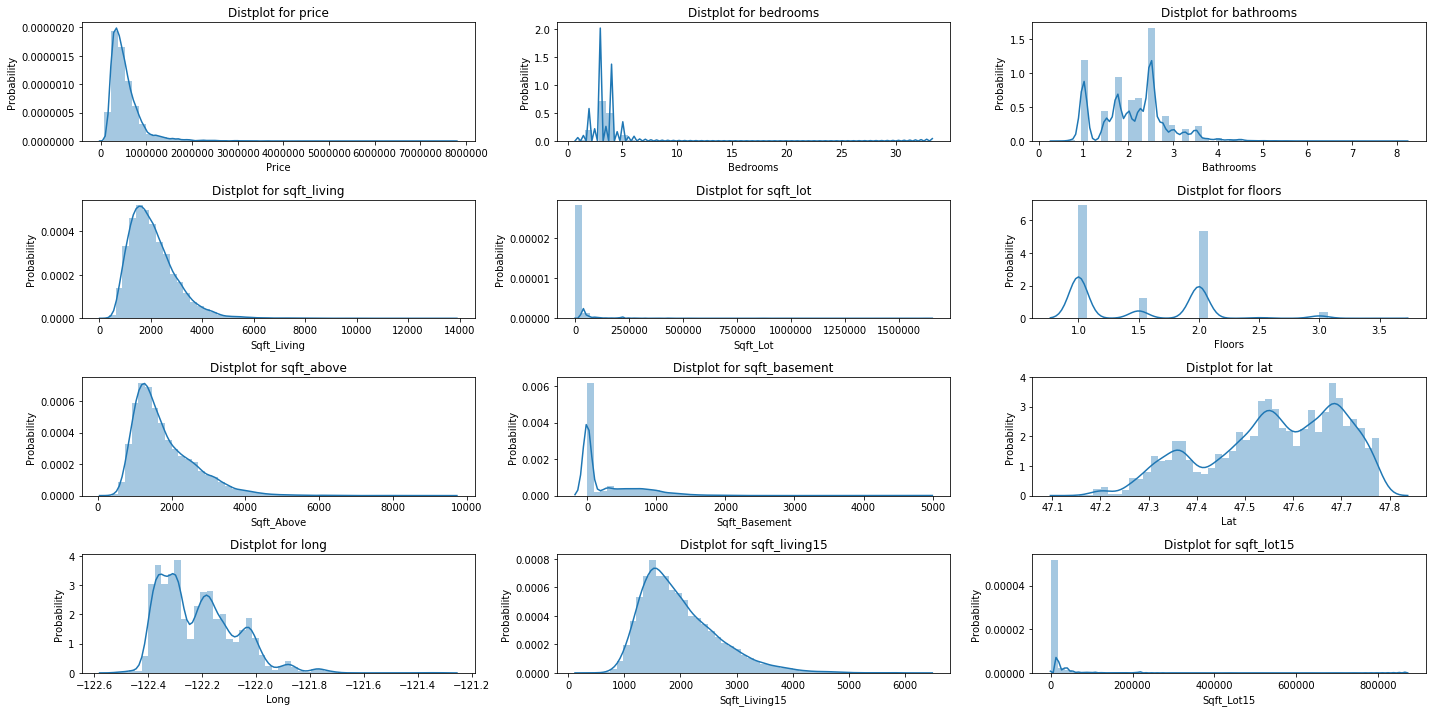

In [17]:
dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1)
plt.figure(figsize=(20,10))
plotNum = 1
for x in dfNumeric.columns:
    axes = plt.subplot(4, 3, plotNum)
    sns.distplot(a = dfNumeric[x], ax = axes, norm_hist = True)
    plotNum += 1
    plt.title(f'Distplot for {x}')
    plt.xlabel(f'{x.title()}')
    plt.ylabel(f'Probability')
    display(f'{stats.normaltest(dfNumeric[x])}')
plt.tight_layout()

Alas, according to a rigorous test for normality, all numerical columns fail. While normal data would be beneficial, what we really need are for residuals to be normal. Note: For the baseline model we will not be preforming log transforms.

#### Normality Of Residuals

540296.5735055795

'NormaltestResult(statistic=19103.12922431625, pvalue=0.0)'

3.3731999814789093

'NormaltestResult(statistic=13605.48590817043, pvalue=0.0)'

2.1158262721674306

'NormaltestResult(statistic=1446.944391092601, pvalue=0.0)'

2080.3218502569803

'NormaltestResult(statistic=6855.449019773223, pvalue=0.0)'

15099.408760475992

'NormaltestResult(statistic=38919.8713482212, pvalue=0.0)'

1.4940964022780943

'NormaltestResult(statistic=1554.261697908209, pvalue=0.0)'

1788.5968421540028

'NormaltestResult(statistic=6010.928373136612, pvalue=0.0)'

291.8517239748371

'NormaltestResult(statistic=6285.543043405674, pvalue=0.0)'

47.56009299439733

'NormaltestResult(statistic=1779.5572414724743, pvalue=0.0)'

-122.21398249756845

'NormaltestResult(statistic=2568.0999446637043, pvalue=0.0)'

1986.6203176367087

'NormaltestResult(statistic=3736.2275785753695, pvalue=0.0)'

12758.283511598833

'NormaltestResult(statistic=32978.41925603968, pvalue=0.0)'

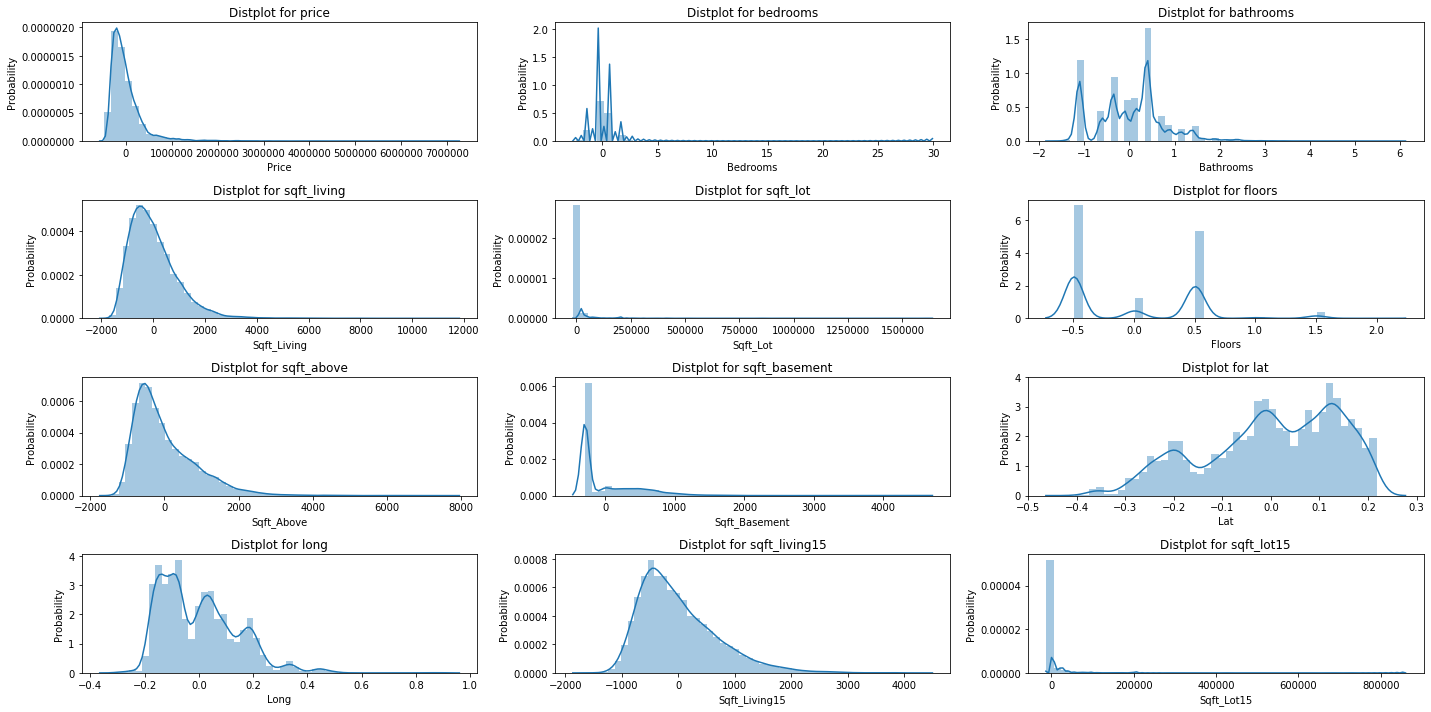

In [18]:
dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1)
plt.figure(figsize=(20,10))
plotNum = 1
for x in dfNumeric.columns:
    axes = plt.subplot(4, 3, plotNum)
    mean = dfNumeric[x].mean()
    data = dfNumeric[x] - mean
    display(mean)
    sns.distplot(a = data, ax = axes, norm_hist = True)
    plotNum += 1
    plt.title(f'Distplot for {x}')
    plt.xlabel(f'{x.title()}')
    plt.ylabel(f'Probability')
    display(f'{stats.normaltest(dfNumeric[x])}')
plt.tight_layout()

## Normalizing Data

In order for all our independent variable to be clearly represented in the analysis they must be normalized. For the baseline model we will use standard normalization.

In [19]:
for x in dfNumeric.columns:
    mean = dfNumeric[x].mean()
    std = dfNumeric[x].std()
    dfNumeric[x] = dfNumeric[x].apply(lambda x: (x - mean)/std)
dfNumeric.head()
dfNumeric.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## Encoding Categorical Data

Moving on to our baseline model we need to encode our categorical data. The approach we will be using in one-hot encoding.

In [20]:
dfcatCols = dfPreprocessed.select_dtypes('category')
encodedCatCols = pd.get_dummies(dfcatCols, drop_first = True)
dfFinal = pd.concat([dfNumeric,encodedCatCols], axis = 1)
dfFinal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 287 entries, price to zipcode_98199
dtypes: float64(12), uint8(275)
memory usage: 7.6 MB


## Creating The Model

With all the data preped we move forward with creating out baseline model.

In [21]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
Y = dfFinal['price']
X = dfFinal.drop(labels = 'price', axis = 1)
X = sm.add_constant(X)
predictors = '+'.join(dfFinal.drop(labels = 'price', axis = 1).columns)
# formula = outcome + '~' + predictors
# display(formula)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     393.5
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        08:37:31   Log-Likelihood:                -10801.
No. Observations:               21597   AIC:                         2.218e+04
Df Residuals:                   21310   BIC:                         2.447e+04
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3816      0.417     -0.916      0.360      -1.198       0.435
bedrooms               -0.0304      0.004     -8.172      0.000      -0.038      -0.023
bathrooms               0.0520      0.005      9.961      0.000       0.042       0.062
sqft_living             0.2188      0.039      5.576      0.000       0.142       0.296
sqft_lot                0.0286      0.004      7.133      0.000       0.021       0.036
floors                 -0.0468      0.005    -10.026      0.000      -0.056      -0.038
sqft_above              0.1726      0.035      4.864      0.000       0.103       0.242
sqft_basement           0.0288      0.019      1.543      0.123      -0.008       0.065
lat                     0.0822      0.022      3.712      0.000       0.039       0.126
long                   -0.0804      0.016     -4.978      0.000      -0.112      -0.049
sqft_living15           0.0322      0.005      6.364      0.000       0.022       0.042
sqft_lot15             -0.0081      0.004     -1.951      0.051      -0.016    3.81e-05
waterfront_1.0          1.6430      0.042     39.183      0.000       1.561       1.725
waterfront_Null         0.0016      0.009      0.186      0.852      -0.016       0.019
view_1.0                0.2312      0.023     10.016      0.000       0.186       0.276
view_2.0                0.1916      0.014     13.594      0.000       0.164       0.219
view_3.0                0.4126      0.019     21.357      0.000       0.375       0.450
view_4.0                0.8023      0.029     27.583      0.000       0.745       0.859
view_Null               0.1629      0.051      3.198      0.001       0.063       0.263
condition_2             0.2511      0.082      3.070      0.002       0.091       0.411
condition_3             0.2767      0.076      3.636      0.000       0.128       0.426
condition_4             0.3479      0.076      4.569      0.000       0.199       0.497
condition_5             0.4682      0.077      6.113      0.000       0.318       0.618
grade_4                -0.3349      0.412     -0.813      0.416      -1.143       0.473
grade_5                -0.4266      0.406     -1.052      0.293      -1.221       0.368
grade_6                -0.4226      0.405     -1.044      0.297      -1.216       0.371
grade_7                -0.3953      0.405     -0.976      0.329      -1.189       0.398
grade_8                -0.3360      0.405     -0.830      0.407      -1.130       0.458
grade_9                -0.1423      0.405     -0.351      0.725      -0.936       0.652
grade_10                0.1912      0.405      0.472      0.637      -0.603       0.986
grade_11                0.7396      0.406      1.821      0.069      -0.056       1.535
grade_12                1.8708      0.408      4.583      0.000       1.071       2.671
gra

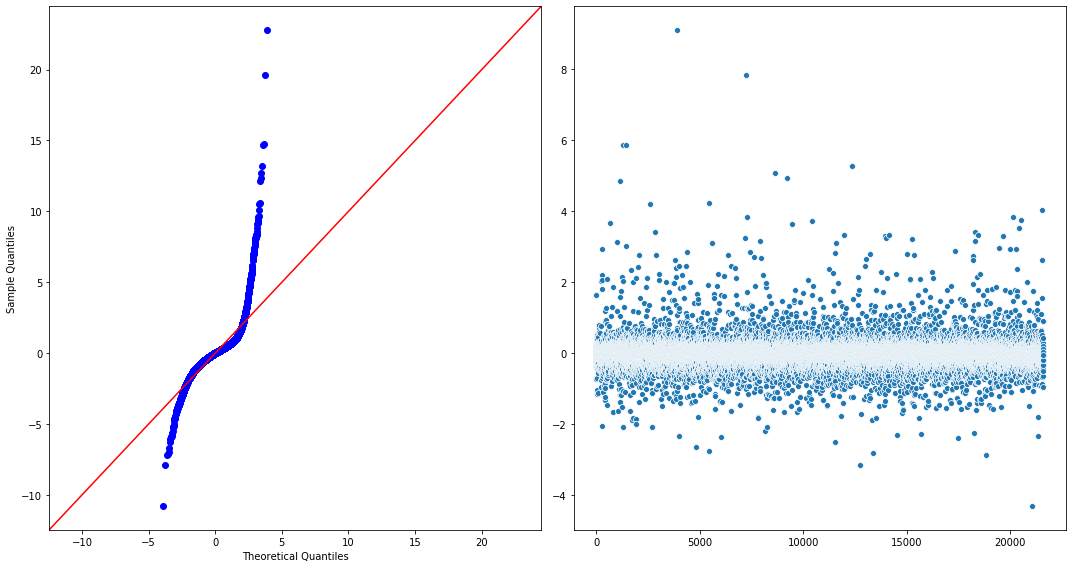

In [23]:
import scipy.stats as stats
residuals = model.resid
plt.figure(figsize=(15,8))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
sns.scatterplot(data = residuals, ax = axes2)
plt.tight_layout()
plt.show()

## Base Model Conclusions

As far as base models go, this was a great first attempt. With an adjusted R-squared value of 0.839. However, this number should be taken with a grain of salt considering we've failed the normal residuals assumption needed for an accurate linear regression. The following models will refine the data further to establish the assumptions.

# Improving The Baseline Model

## Removing Outliers

In [ ]:
listOfIndecies = []
for x in dfNumeric.columns:
    mean = dfNumeric[x].mean()
    std = dfNumeric[x].std()
    for y in dfNumeric[x]:
        if ((y < mean - 3*std) and (y > mean + 3*std)):
            for i in dfNumeric[x].loc[dfNumeric[x] == y].index:
                if i in listOfIndecies:
                    pass
                else:
                    listOfIndecies.append(i)
        else:
            pass
listOfIndecies


In [ ]:
mean =dfNumeric['sqft_living'].mean()
std =dfNumeric['sqft_living'].std()

display(mean, std)
dfNumeric['sqft_living'].loc[(dfNumeric['sqft_living'] > dfNumeric['sqft_living'].mean() + 3*dfNumeric['sqft_living'].std())]